In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Hough Trasform
more deterministic and find multiple answer of one shape in image
when we use polar system we can limit the row and column for vote te parameter

row: angle --> 0-360

column: diagonal of image --> maximum length of r

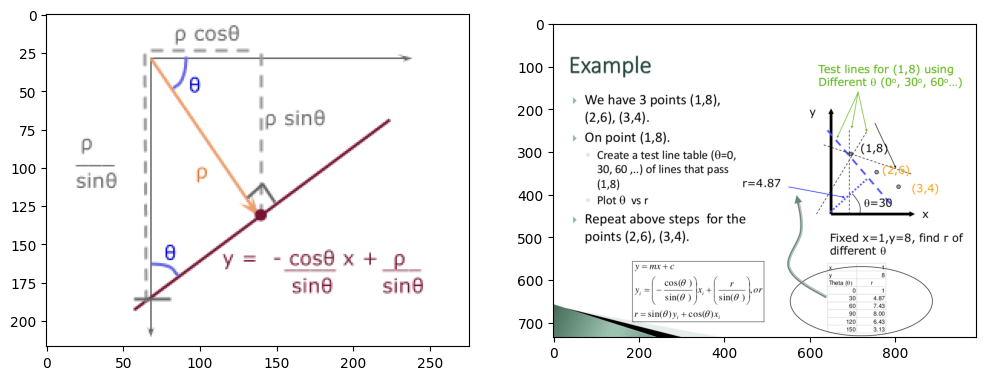

In [13]:
img = cv.imread('hough_deriving.png')
img2 = cv.imread('houghTransformationLine.png')
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()

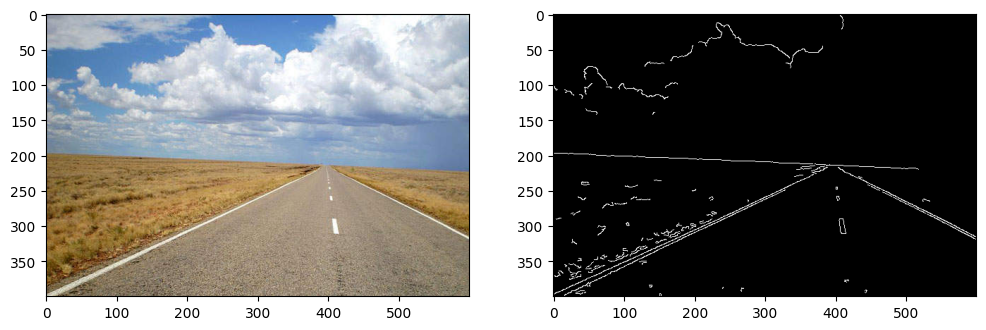

In [34]:
highway = cv.imread('highway2.jpeg')
s = cv.getGaussianKernel(3, 1)
s = s @ s.T
highway_s = cv.filter2D(highway, -1, s)
highwayEdge = cv.Canny(highway_s, 150, 250)

highwayEdge = (highwayEdge > 100).astype(np.uint8) # binary image
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(highway[:, :, ::-1])
plt.subplot(122)
plt.imshow(highwayEdge, cmap='gray')
plt.show()

In [64]:
def f_getExtence(m, h, num_row, num_col):
    r1 = int(0)
    r2 = int(num_row - 1)
    c1 = int(m * r1 + h)
    c2 = int(m * r2 + h)
    
    return (c1, r1), (c2, r2) # in cv2 

In [91]:
def HoughLine(EdgeImage):
    angle = np.deg2rad(np.arange(90)) # use 90 degree instead of 360
    numRow, numCol = EdgeImage.shape[0], EdgeImage.shape[1]
    diagonal = int(np.sqrt(numRow ** 2 + numCol ** 2))
    H = np.zeros((diagonal, len(angle)))
    idx = np.argwhere(EdgeImage)
    row, col = idx[:, 0], idx[:, 1]
    for i in range(len(row)):
        x, y = row[i], col[i]
        for ang in angle:
            di = int(x * np.cos(ang) + y * np.sin(ang))
            if di > 0 and di < diagonal:
                H[di, int(np.rad2deg(ang))] += 1
                
    return H

In [92]:
# def HoughLine(EdgeImage):
#     angle = np.deg2rad(np.arange(360))
#     numRow, numCol = EdgeImage.shape[0], EdgeImage.shape[1]
#     diagonal = int(np.sqrt(numRow ** 2 + numCol ** 2))
#     H = np.zeros((diagonal, len(angle)))
#     idx = np.argwhere(EdgeImage)
#     row, col = idx[:, 0], idx[:, 1]
#     for i in range(len(row)):
#         x, y = row[i], col[i]
#         for ang in angle:
#             di = int(x * np.cos(ang) + y * np.sin(ang))
#             if di > 0 and di < diagonal:
#                 H[di, int(np.rad2deg(ang))] += 1
                
#     idx = np.argwhere(H == H.max())
#     d, theta = idx[0,0], np.deg2rad(idx[0,1] )
    
#     m = -1 / np.tan(thet)
#     h = d / np.sin(thet)
    
#     r1 = int(0)
#     r2 = int(numRow - 1)
#     c1 = int(m * r1 + h)
#     c2 = int(m * r2 + h)
#     p1, p2 = (c1, r1), (c2, r2)
    
#     E2 = np.zeros((highwayEdge.shape[0], highwayEdge.shape[1], 3), dtype=np.uint8)
#     E3 = np.array(highwayEdge, dtype=np.uint8) * 255
#     E2[:, :, 0] = E2[:, :, 1] = E2[:, :, 2] = E3
    
#     return cv.line(E2, p1, p2, (0, 0, 255), 3)

In [106]:
s = HoughLine(highwayEdge)

In [145]:
# idx = np.argwhere(s == np.unique(s)[-2])
idx = np.argwhere(s == s.max())
d, theta = idx[0,0], idx[0,1]

In [95]:
d, theta

(365, 26)

In [96]:
thet = np.deg2rad(theta)
m = -1 / np.tan(thet)
h = d / np.sin(thet)
m, h

(-2.0503038415792965, 832.6277919372736)

In [97]:
p1, p2 = f_getExtence(m, h, highwayEdge.shape[0], highwayEdge[1])

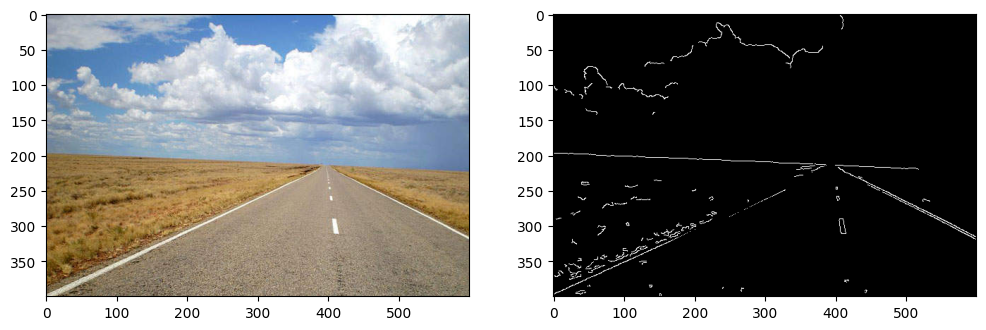

In [98]:
shape_highway = cv.line(highwayEdge, p1, p2, (0, 0, 255), 3)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(highway[:, :, ::-1])
plt.subplot(122)
plt.imshow(shape_highway, cmap='gray')
plt.show()

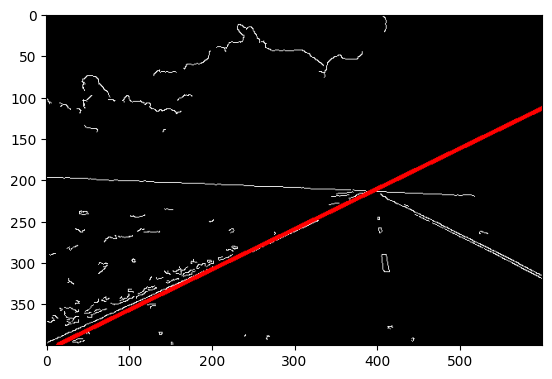

In [89]:
E2 = np.zeros((highwayEdge.shape[0], highwayEdge.shape[1], 3), dtype=np.uint8)
E3 = np.array(highwayEdge, dtype=np.uint8)
# E3[E3 == 0] = 255
E3[E3 > 0] = 255
E2[:, :, 0] = E3
E2[:, :, 1] = E3
E2[:, :, 2] = E3
I = cv.line(E2, p1, p2, (0, 0, 255), 3)
plt.imshow(I[:, :, ::-1])

# make it faster:
use just on degree, and that degree is Gradient direction

# Hough circle

In [156]:
def HoughCircle(EdgeImage):
    numRow, numCol = EdgeImage.shape[0], EdgeImage.shape[1]
    diagonal = int(np.sqrt(numRow ** 2 + numCol ** 2))
    H = np.zeros((numRow, numCol, diagonal))
    idx = np.argwhere(EdgeImage)
    row, col = idx[:, 0], idx[:, 1]
    for i in range(len(row)):
        for a in range(numRow):
            for b in range(numCol):
                x, y = row[i], col[i]
                di = int(np.sqrt((x - a) ** 2 + (y - b) ** 2))
                if di > 0 and di < diagonal:
                    H[a, b, di] += 1
                
    return H

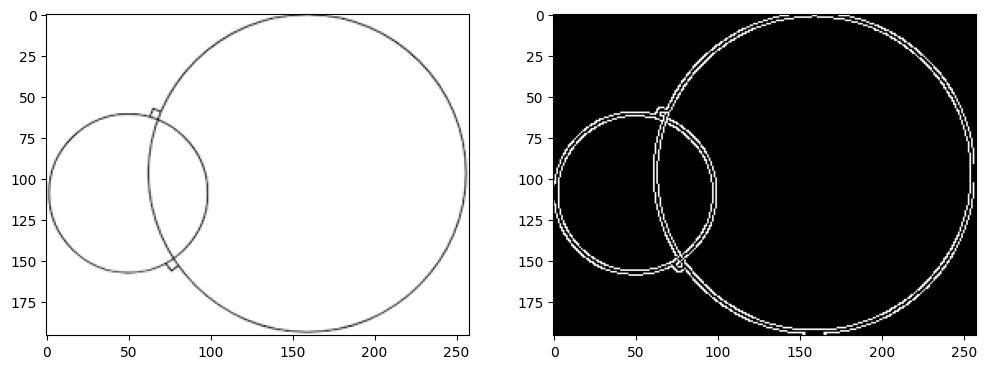

In [159]:
img = cv.imread('circle.png')
s = cv.getGaussianKernel(3, 1)
s = s @ s.T
circle_s = cv.filter2D(img, -1, s)
circle_edge = cv.Canny(circle_s, 150, 250)

circle_edge = (circle_edge > 100).astype(np.uint8) # binary image
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
plt.subplot(122)
plt.imshow(circle_edge, cmap='gray')
plt.show()

In [160]:
H = HoughCircle(circle_edge)

In [165]:
# idx = np.argwhere(H == H.max())
idx = np.argwhere(s == np.unique(s)[-2])
x, y, d = idx[0,0], idx[0,1], idx[0, 2]

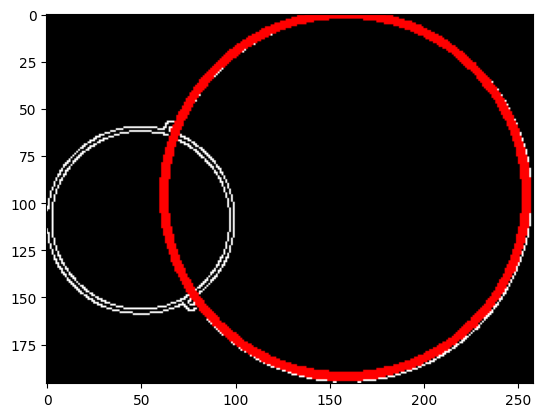

In [171]:
idx = np.argwhere(H == np.unique(H)[-5])
x, y, d = idx[0,0], idx[0,1], idx[0, 2]
E2 = np.zeros((circle_edge.shape[0], circle_edge.shape[1], 3), dtype=np.uint8)
E3 = np.array(circle_edge, dtype=np.uint8)
# E3[E3 == 0] = 255
E3[E3 > 0] = 255
E2[:, :, 0] = E3
E2[:, :, 1] = E3
E2[:, :, 2] = E3
I = cv.circle(E2, (y, x), d, (0, 0, 255), 3)
plt.imshow(I[:, :, ::-1])